## About Dataset

### Context
This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

### Content

The following is a description of the columns in the dataset.

- age :Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in the dataset.
- hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 to signify a patient doesnot have hypertension and 1 to signify a patient has hypertension.
- heart_disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 to indicate a patient doesnot have heart disease and 1 to indicate a patient has heart disease.
- smoking_history: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated. It has values such as never, current, not current, former and No info.
- bmi: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk. Values in the dataset ranges from 23 to 95.
- HbA1c_level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Values in the dataset ranges from 3 to 9.
- Blood glucose level refers to the amount of glucose in the bloodstream at a given time. Values in the dataset ranges from 80 to 300.
- diabetes: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.


In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import pickle
warnings.filterwarnings("ignore")
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler, SMOTE
from xgboost import XGBClassifier

In [2]:
# Reading in the Dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Getting the shape of the dataset
print('There are {} rows and {} columns in the dataset'.format(data.shape[0], data.shape[1]))

There are 100000 rows and 9 columns in the dataset


The dataset has 100000 rows and nine columns.

In [4]:
# Getting information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Checking for duplicated rows.
print('There are {} duplicated rows in the dataset'.format(data.duplicated().sum()))

There are 3854 duplicated rows in the dataset


There are 3854 duplicated rows in the dataset. These values will be removed from the dataset.

In [6]:
data.drop_duplicates(inplace = True)

The duplicated rows have been removed successfully.

In [7]:
# Checking the percentage of missing values in each of the columns in the dataset. 
missing_df = pd.DataFrame((data.isnull().mean()*100), 
columns = ['missing value(%)'])
missing_df

,missing value(%)
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
smoking_history,0.0
bmi,0.0
HbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0


There are no missing values in all the columns of the dataset

In [8]:
#Printing the unique values in each columns
for columns in data.columns:
    print(columns)
    print('-'*50) 
    print(sorted(data[columns].unique()))

gender
--------------------------------------------------
['Female', 'Male', 'Other']
age
--------------------------------------------------
[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08, 1.16, 1.24, 1.32, 1.4, 1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]
hypertension
--------------------------------------------------
[0, 1]
heart_disease
--------------------------------------------------
[0, 1]
smoking_history
--------------------------------------------------
['No Info', 'current', 'ever', 'former', 'never',

There are no abnormal values in each of the columns in the dataset.

In [9]:
# Getting a statistical summary of numerical columns in the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


- The minimum age is 0.08 years, The median age is 43 and the maximum is 80.
- The average bmi of the patients is 27.32 and the maximum bmi is 95.69.
- From the summary statistics, it can be seen that the 'hypertension' column, the 'heart_disease' column and the diabetes columns are binary categorical values.

In [10]:
df = data.copy()

In [11]:
# Changing the 'hypertension', 'heart_disease' and 'diabetes' columns to a categorical type
df['hypertension'] = df['hypertension'].astype('category')
df['heart_disease'] = df['heart_disease'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  object  
 1   age                  96146 non-null  float64 
 2   hypertension         96146 non-null  category
 3   heart_disease        96146 non-null  category
 4   smoking_history      96146 non-null  object  
 5   bmi                  96146 non-null  float64 
 6   HbA1c_level          96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  category
dtypes: category(3), float64(3), int64(1), object(2)
memory usage: 5.4+ MB


The datatype of the columns has been converted successfully.

In [13]:
# Getting a statistical summary of categorical columns in the dataset.
df.describe(exclude = ['int', 'float']).T

,count,unique,top,freq
gender,96146,3,Female,56161
hypertension,96146,2,0,88685
heart_disease,96146,2,0,92223
smoking_history,96146,6,never,34398
diabetes,96146,2,0,87664


## EDA

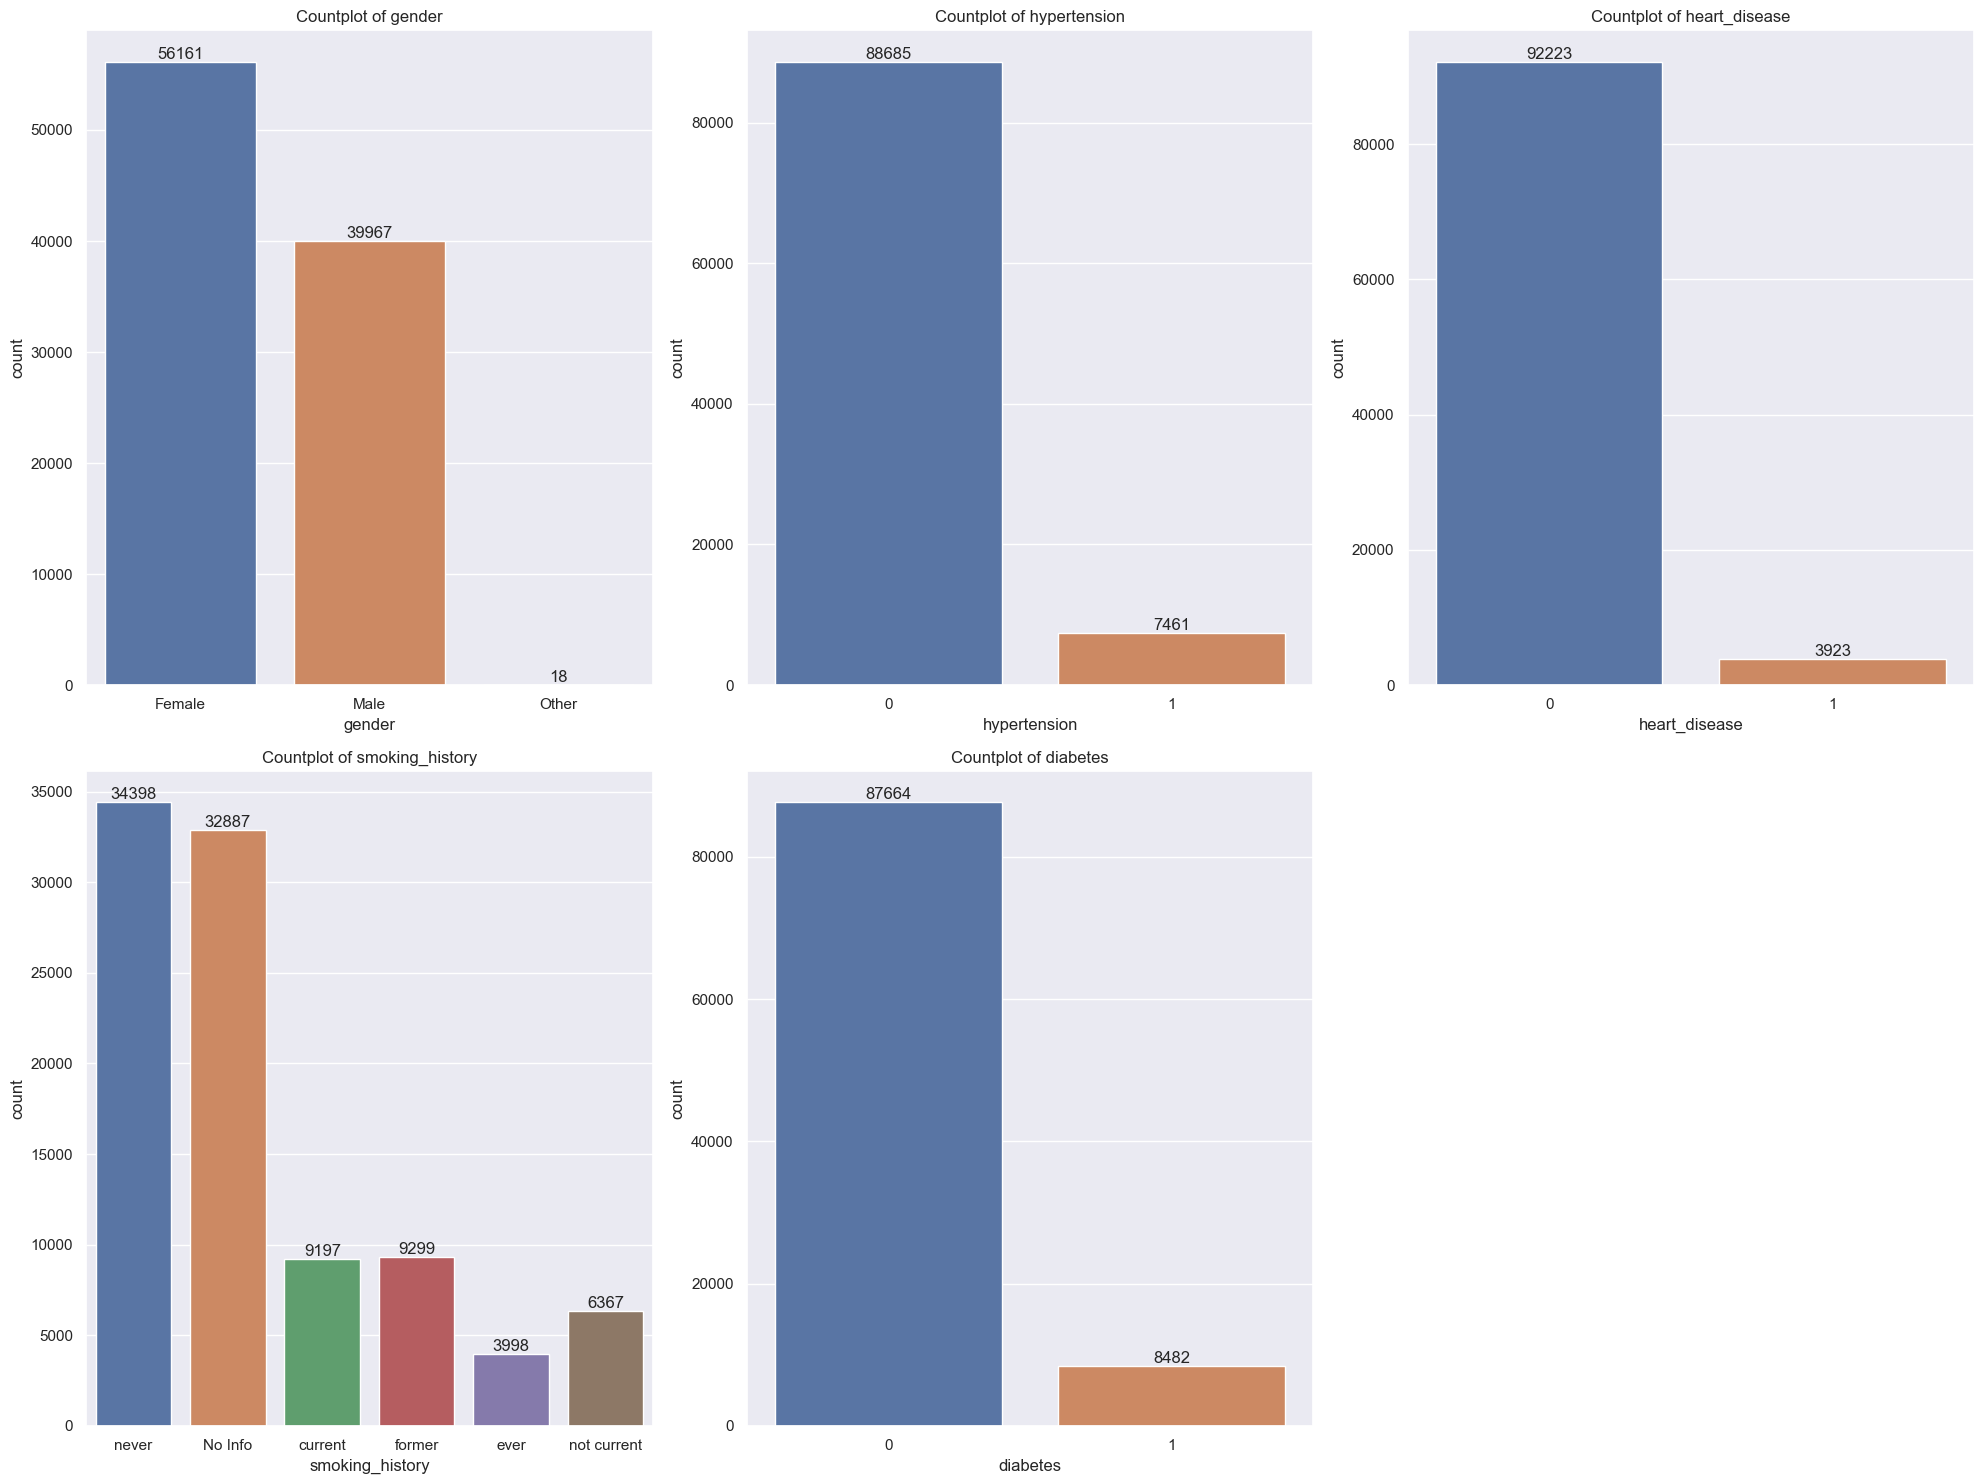

In [14]:
# Analyzing the categorical columns
cat_df = df.select_dtypes(exclude=['int', 'float'])

#  Categorical Data
a = 2 # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
sns.set()
fig = plt.figure(figsize=(20, 15))
for i in cat_df.columns:
    plt.subplot(a, b, c)
    plt.title('Countplot of {}'.format(i))
    plt.xlabel(i)
    ax = sns.countplot(data = cat_df, x = i)
    for container in ax.containers:
        ax.bar_label(container)
    c = c + 1

plt.tight_layout()
plt.show()

- Majority of the patients are from the female gender (56161 patients) followed by the male gender (39967 patients) and 18 patients of the 'other' gender.
- Most of the patients had never smoked with a frequency of 34398 and 3998 has been smoking for a long time.
- 87664 patients do not have diabetes while 8482 patients had diabetes. This shows that there is a huge class imbalance in the dataset as this is the target variable.

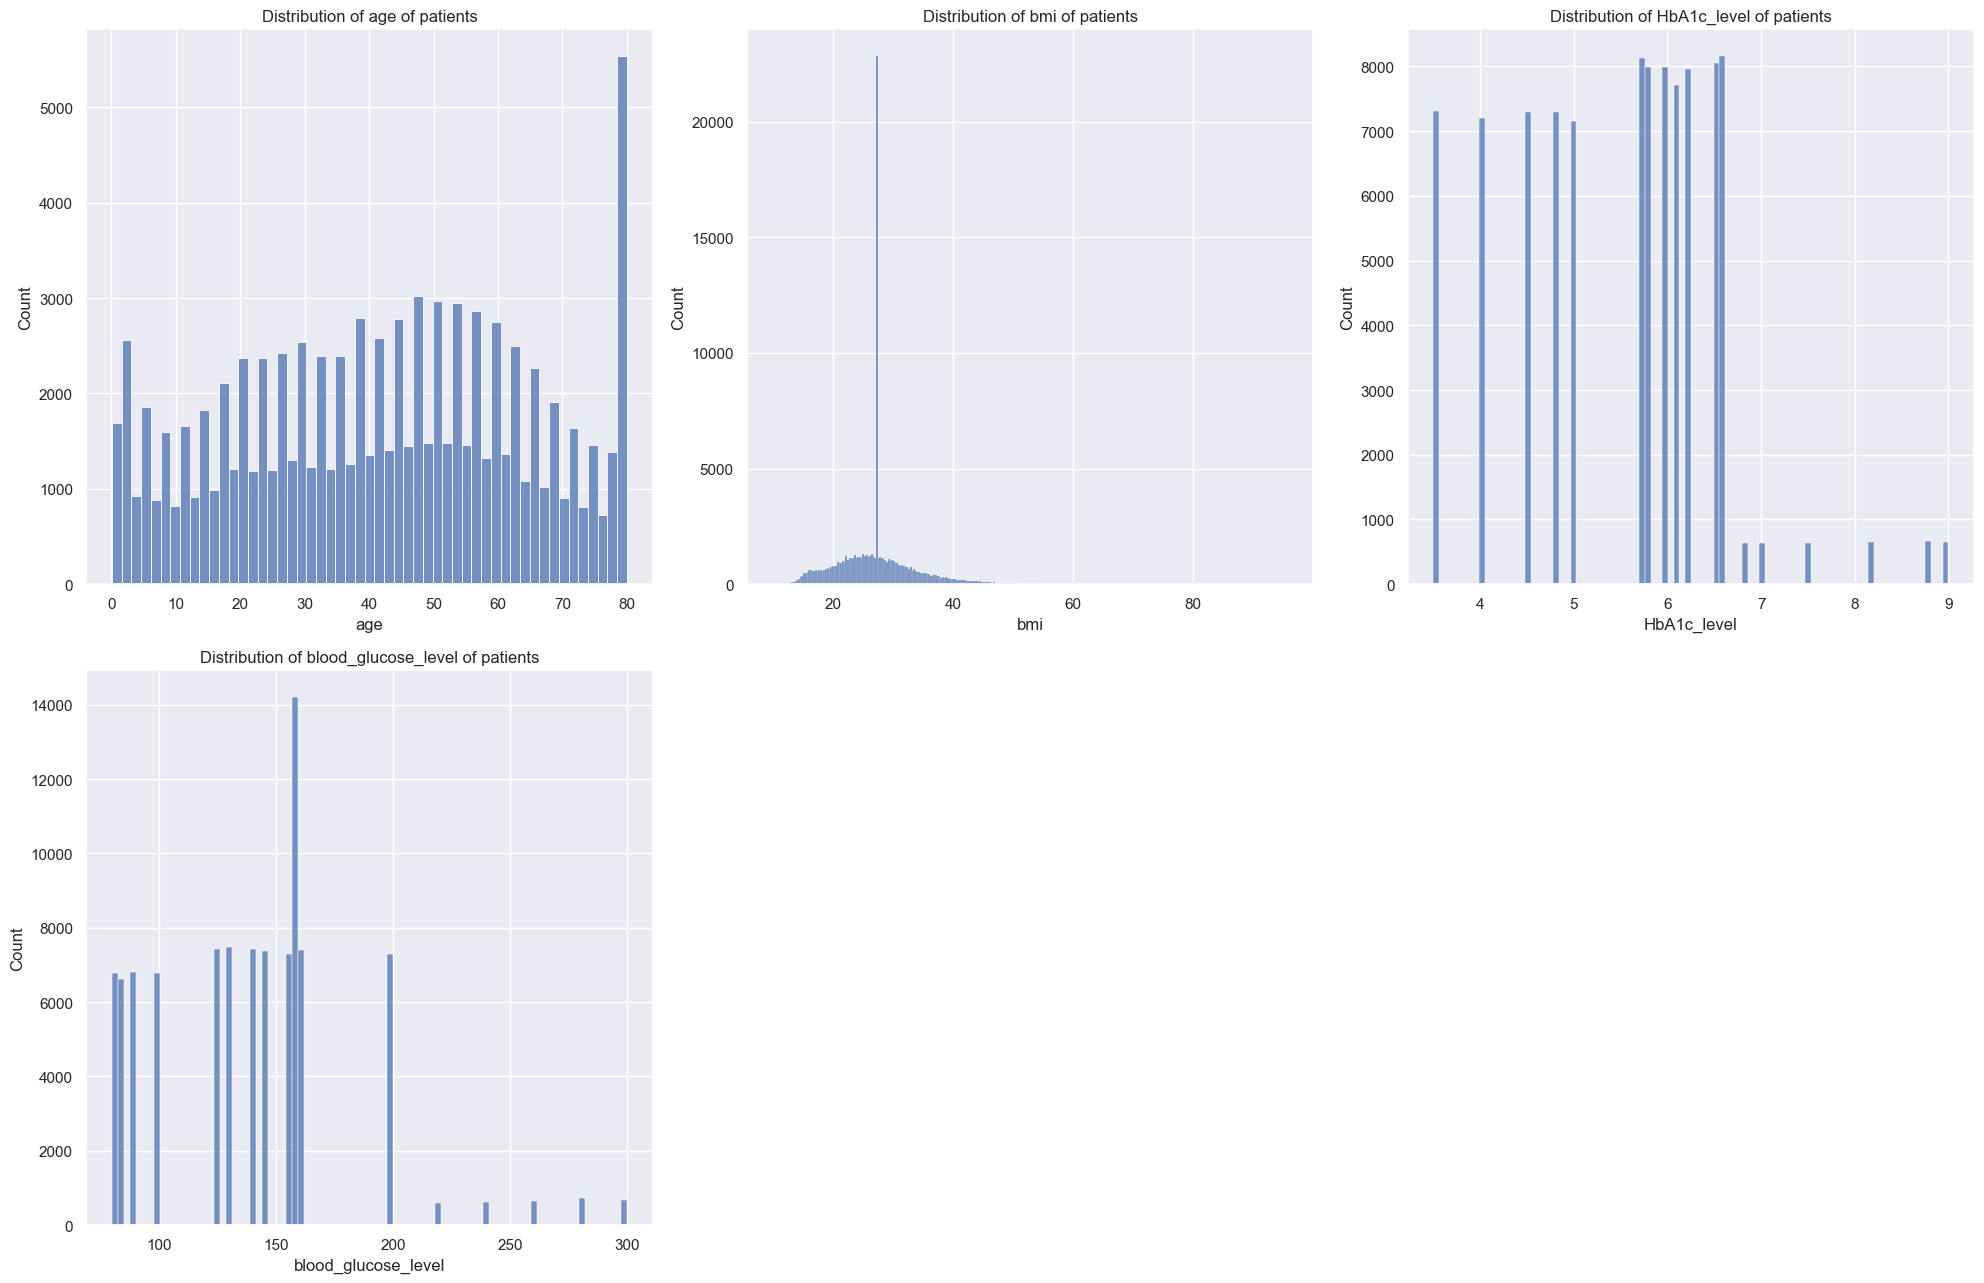

In [15]:
# Analyzing the numerical columns...
num_df = df.select_dtypes(include=['int', 'float'])

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter


sns.set()
fig = plt.figure(figsize=(20, 13))
for i in num_df.columns:
    plt.subplot(a, b, c)
    plt.title('Distribution of {} of patients'.format(i))
    plt.xlabel(i)
    sns.histplot(data = num_df, x=i)
    c = c + 1

plt.tight_layout()
plt.show()

- Most of the patients are within the ages of 20 to 70. 
- There is a huge count of patients aged 80.
- There is a huge count of patients with a bmi of 27.32. This can be seen as a huge spike in the histogram for the bmi.
- Most of the patients HbA1c value ranges from 3.5 to 6.5. 

### Multivariate EDA

In [16]:
# Creating a function to calculate counts of categorical columns against the 'diabetes' columns
def contingency_table(data, col1, col2):
    print(pd.crosstab(df[col1], df[col2], margins=True))
    plt.figure(figsize=(15, 8))
    ax = sns.countplot(data=df, x=col2, hue=col1)
    plt.title('Counts of {} for patients with Diabetes and patients without Diabetes'.format(col2))
    for container in ax.containers:
        ax.bar_label(container)

gender    Female   Male  Other    All
diabetes                             
0          51714  35932     18  87664
1           4447   4035      0   8482
All        56161  39967     18  96146


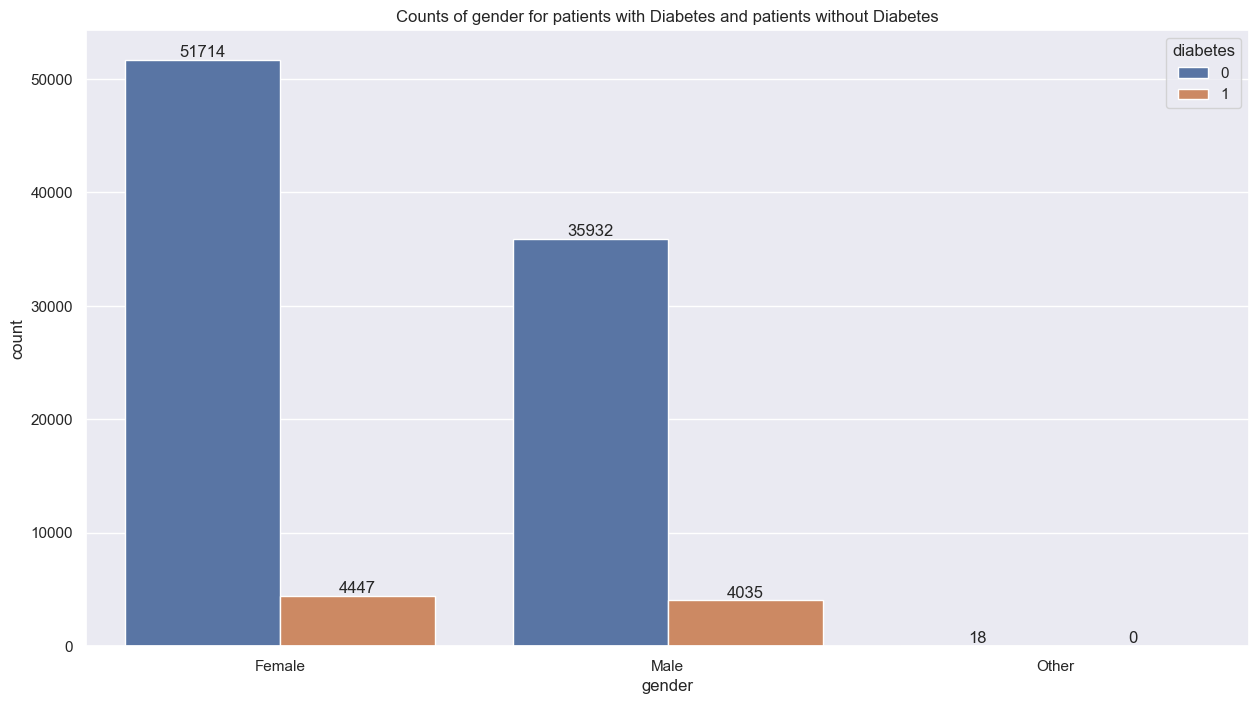

In [17]:
contingency_table(df, 'diabetes', 'gender')

- None of the patients of the 'other' gender had a case of diabetes.
- Male are at a higher risk of having diabetes (11.22%) while females have a risk of 8.60%.

heart_disease      0     1    All
diabetes                         
0              85008  2656  87664
1               7215  1267   8482
All            92223  3923  96146


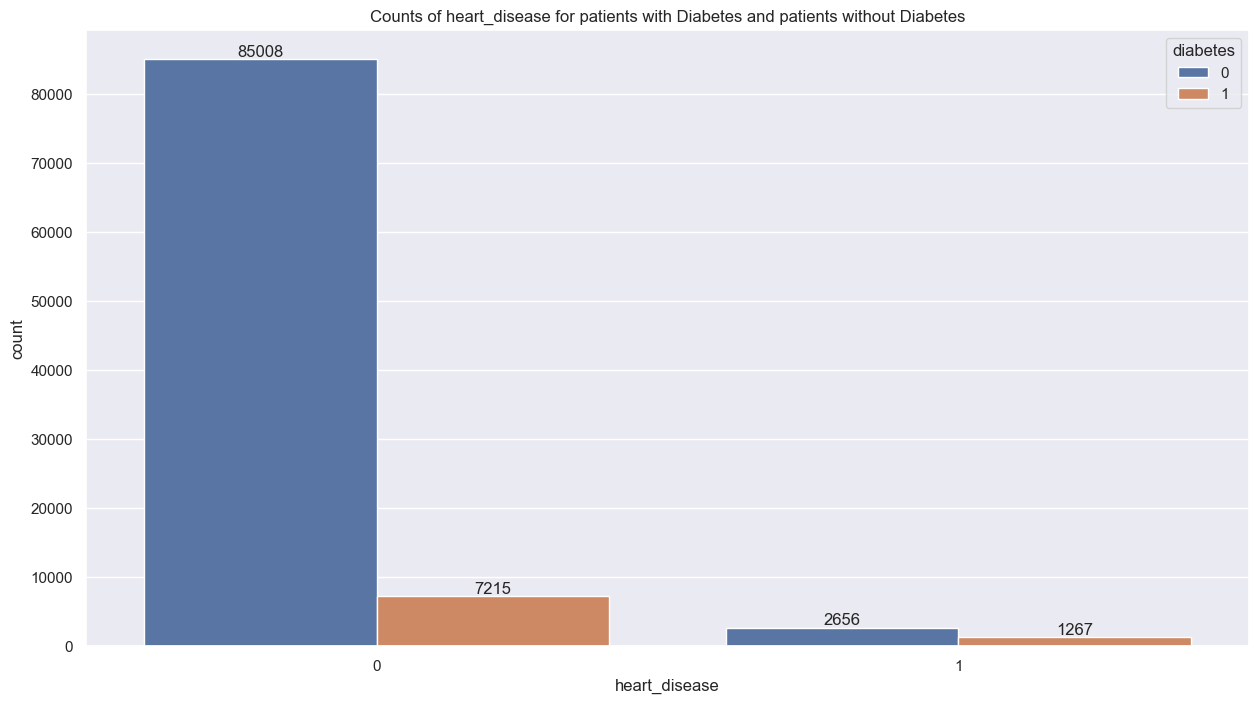

In [18]:
contingency_table(df, 'diabetes', 'heart_disease')

- Patients with heart diseases are at a higher risk of having diabetes (47.7%) than patients without heart_disease (8.49%).

hypertension      0     1    All
diabetes                        
0             82289  5375  87664
1              6396  2086   8482
All           88685  7461  96146


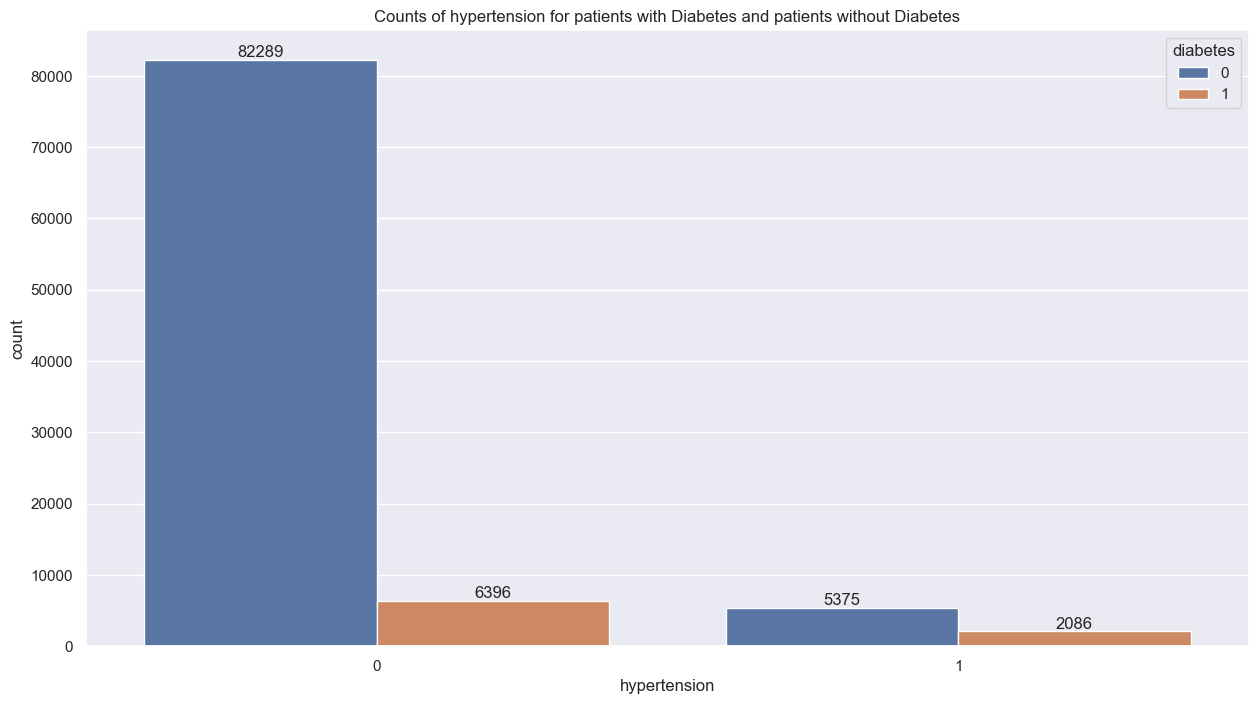

In [19]:
contingency_table(df, 'diabetes', 'hypertension')

- Patients with hypertension are at a higher risk of having diabetes (38.80%) than patients without hypertension (7.77%).

smoking_history  No Info  current  ever  former  never  not current    All
diabetes                                                                  
0                  31442     8249  3526    7709  31061         5677  87664
1                   1445      948   472    1590   3337          690   8482
All                32887     9197  3998    9299  34398         6367  96146


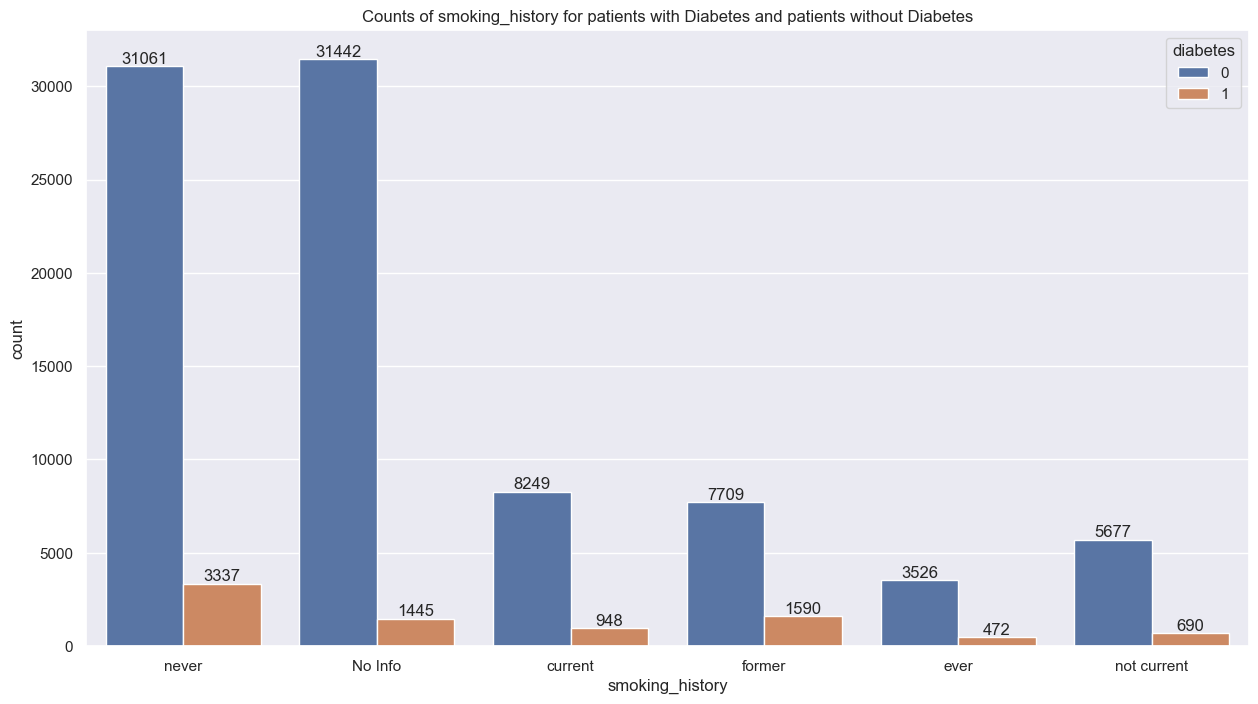

In [20]:
contingency_table(df, 'diabetes', 'smoking_history')

- Patients who have not smoked are at the lowest risk (10.74%) of having diabetes aside from the patients who did not give any information about their smoking history.
- Patients who formerly smokes are at the highest risk of having diabetes.
- On average, patients who had a history of smoking are at a 14.7% risk of having diabetes.

In [21]:
def pivot_analysis(data, col1, col2):
    print(pd.pivot_table(df, index=col1, values=col2, aggfunc=np.mean))
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x=col1, y=col2, showmeans=True)
    plt.title('Distribution of {} for patients with Diabetes and patients without Diabetes'.format(col2))

                age
diabetes           
0         39.943229
1         60.925961


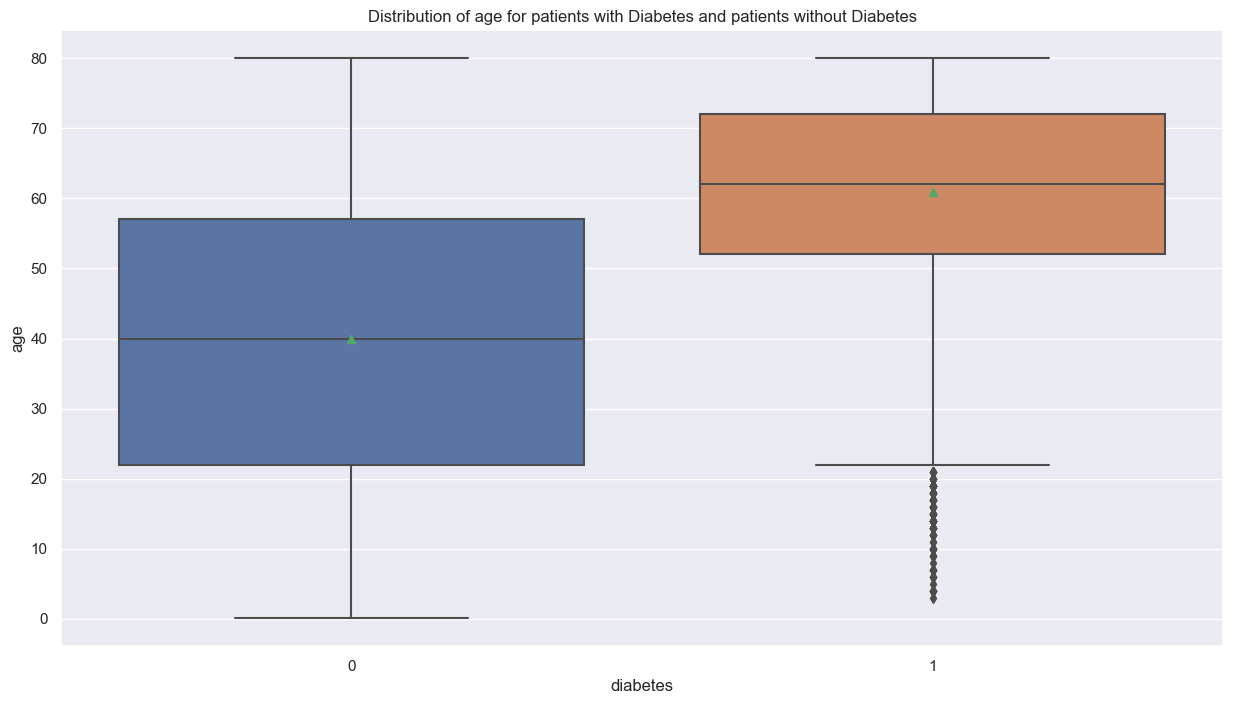

In [22]:
pivot_analysis(df, 'diabetes', 'age')

On average, the age of the diabetic patients, is higher as compared to the age of non-diabetic patients. The means of the two groups is denoted by a green point on the boxplot. This means that the possibility of having diabetes tends to increase with increasing age, this may be due to the deficiency in insulin secretion which reduces with increasing age although there are occurences of children persons the age of 18 having diabetes as can be seen above.

                bmi
diabetes           
0         26.869003
1         31.997755


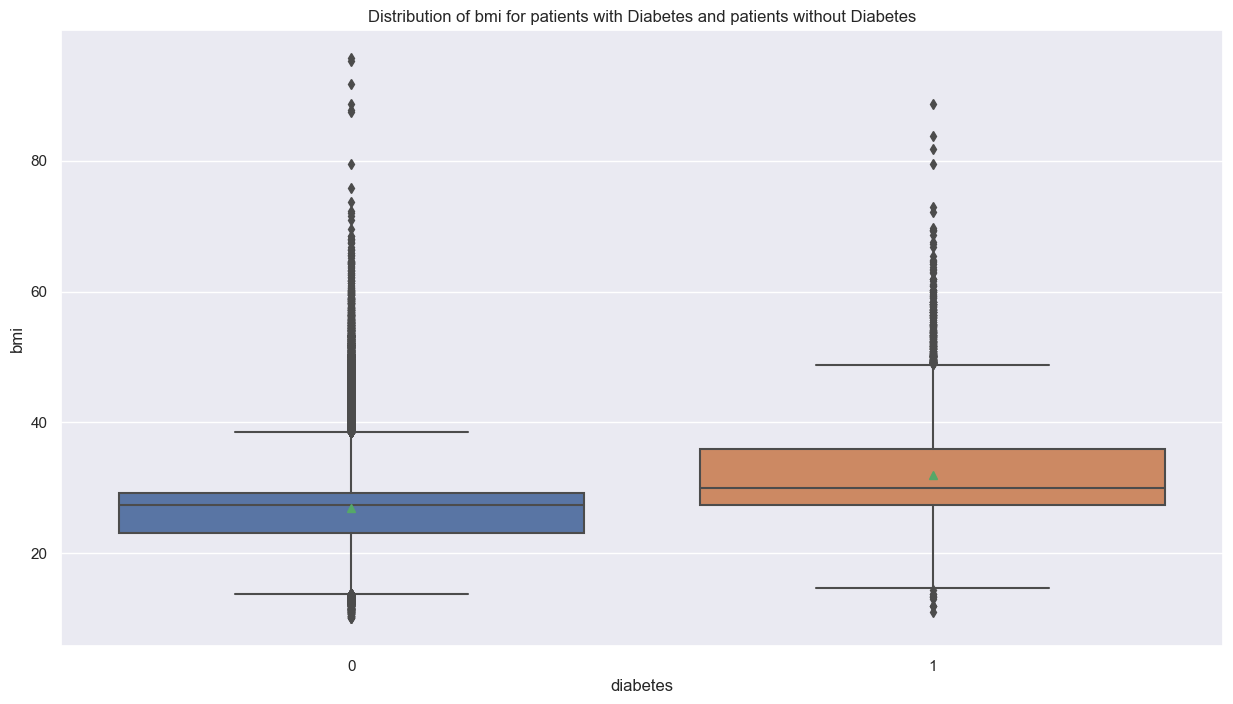

In [23]:
pivot_analysis(df, 'diabetes', 'bmi')

On average, the body mass index of the diabetic patients, is slightly higher as compared to the body mass index of non-diabetic patients. This means that a diabetic patients tends to have a higher body mass index than a non diabetic patient. 

          HbA1c_level
diabetes             
0            5.396936
1            6.934827


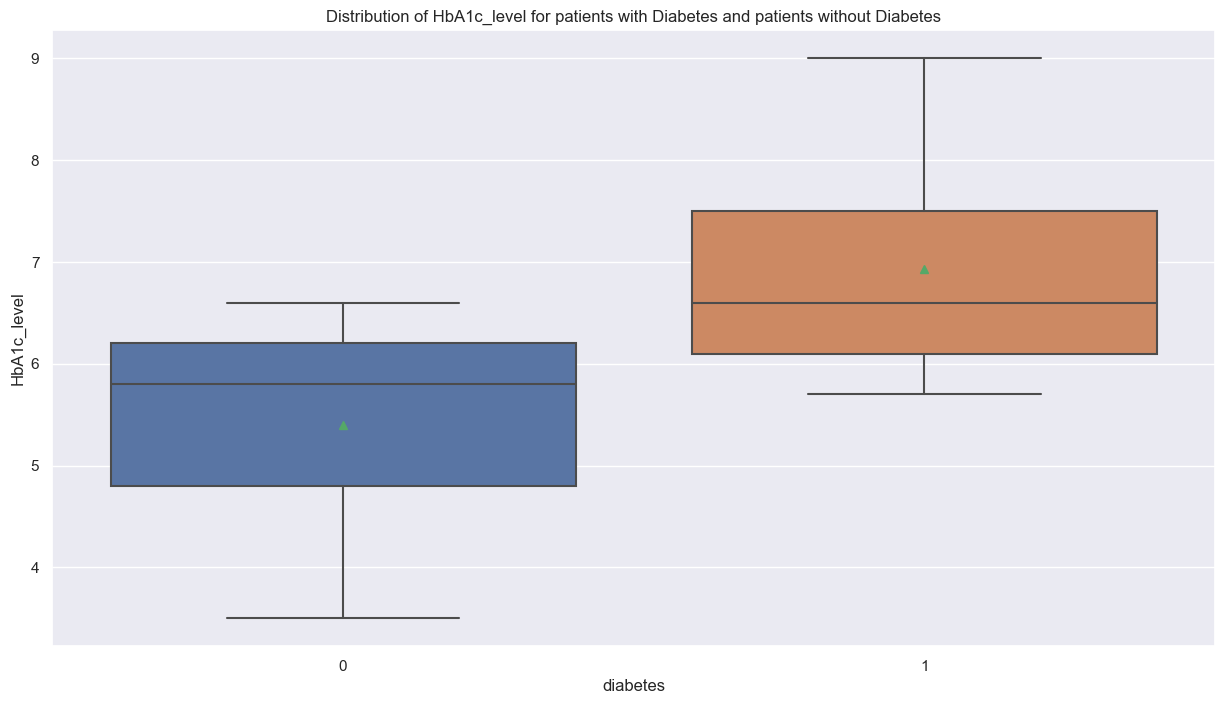

In [24]:
pivot_analysis(df, 'diabetes', 'HbA1c_level')

The HbA1c leel represents the average blood sugar level for patients over a period of 2 to 3 months.
On average, diabetic patients have a higher HbA1c level than non diabetic patients. 

          blood_glucose_level
diabetes                     
0                  132.818489
1                  194.026173


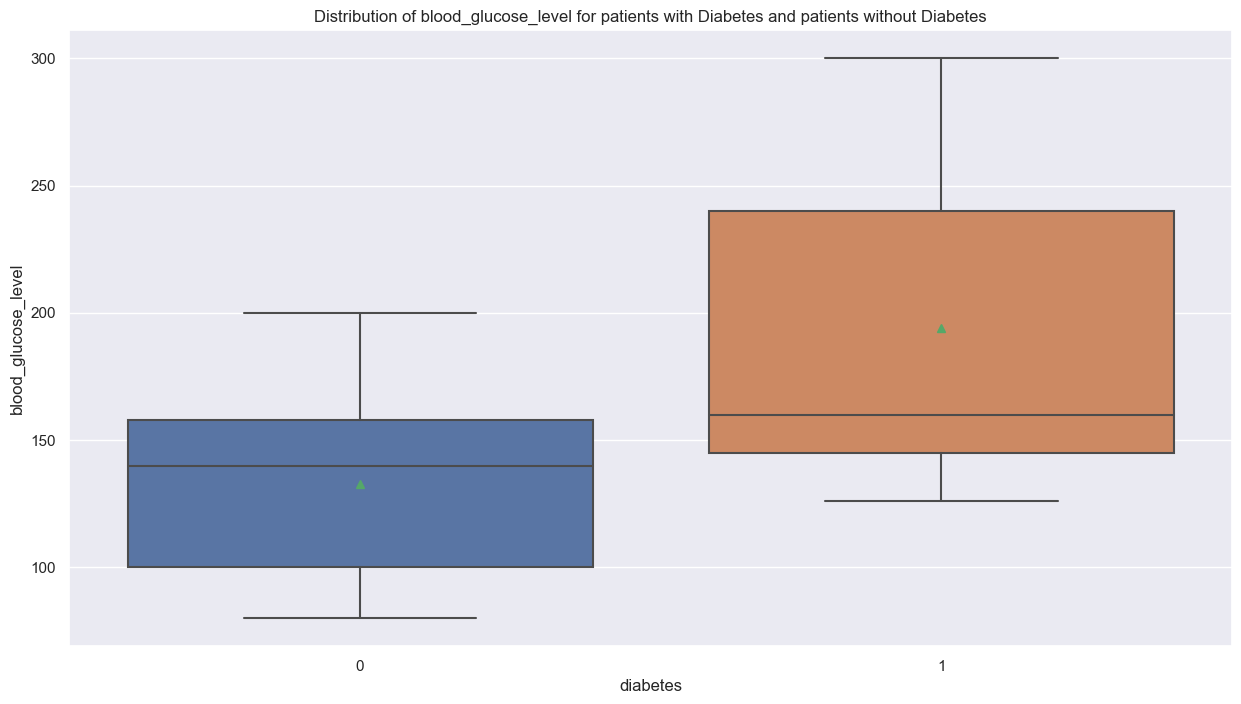

In [25]:
pivot_analysis(df, 'diabetes', 'blood_glucose_level')

Diabetic patients tends to have more blood glucose levels than non diabetic patients. This may stem from the fact that higher levels of blood sugar means the body cannot produce enough insulin to metabolize the glucose thereby leading to diabetic complications.

## Hypothesis Testing

### Chisquare Contingency Test for Association.

In this section, we will carry out the ttest to determine if there are any association between categorical features in the dataset. 

- Null Hypothesis : There is no association between the two columns.
- Alternate Hypothesis : There is an association between the two columns.
- Alpha = 0.05.

Note: If the p value is greater than alpha(0.05), we accept the null hypothesis and if the p value is lesser than alpha(0.05), we reject the null hypothesis.

In [26]:
# Perform chi-square test for each pair of columns
def pairwise_chi_square_test(df):
    columns = df.columns
    num_columns = len(columns)
    p_values = {}

    for i in range(num_columns):
        for j in range(i + 1, num_columns):
            contingency_table = pd.crosstab(df[columns[i]], df[columns[j]])
            chi2, p, _, _ = stats.chi2_contingency(contingency_table)
            p_values[(columns[i], columns[j])] = p

    return p_values

In [27]:
p_values = pairwise_chi_square_test(cat_df)
print("Pairwise Chi-Square Test P-Values:")
print('-' * 50, '\n')
for pair, p_value in p_values.items():
    print(f"{pair}: {p_value}, \n")

Pairwise Chi-Square Test P-Values:
-------------------------------------------------- 

('gender', 'hypertension'): 2.910260692408849e-05, 

('gender', 'heart_disease'): 1.3802097571689723e-129, 

('gender', 'smoking_history'): 2.744301301001053e-237, 

('gender', 'diabetes'): 5.4063313009771595e-31, 

('hypertension', 'heart_disease'): 1.8747670696593588e-302, 

('hypertension', 'smoking_history'): 0.0, 

('hypertension', 'diabetes'): 0.0, 

('heart_disease', 'smoking_history'): 4.382632215166714e-242, 

('heart_disease', 'diabetes'): 0.0, 

('smoking_history', 'diabetes'): 0.0, 



## Test for Association


In this section, test for the degree of statistical association between the categorical columns are carried out using the Cramers V test for association.


Note: Statistical association does not in any way denote causation. Just because there is a high degree of association between two features does not mean one feature causes another. It just means that changes in the value of one feature is consistent with the change in value for another feature.



                Cramer's V               Relationship type
                -------------------|----------------------------
                < 0.10             |           Weak association
                > 0.10 and < 0.25  |           Moderate association
                > 0.25 and < 1     |           Strong association
                1                  |           Perfect association

In [28]:
def pairwise_cramers(df):
    columns = df.columns
    num_columns = len(columns)
    cramers_v = {}

    for i in range(num_columns):
        for j in range(i + 1, num_columns):
            contingency_table = pd.crosstab(df[columns[i]], df[columns[j]])
            pval = stats.contingency.association(
                contingency_table, method='cramer')
            p_values[(columns[i], columns[j])] = pval

    return p_values

In [29]:
p_values = pairwise_cramers(cat_df)
print("Pairwise Cramers V Test P-Values:")
print('-' * 50, '\n')
for pair, p_value in p_values.items():
    print(f"{pair}: {p_value}, \n")

Pairwise Cramers V Test P-Values:
-------------------------------------------------- 

('gender', 'hypertension'): 0.014739984100931691, 

('gender', 'heart_disease'): 0.0785626976788291, 

('gender', 'smoking_history'): 0.07678650027513827, 

('gender', 'diabetes'): 0.03807523728401121, 

('hypertension', 'heart_disease'): 0.11998196104310116, 

('hypertension', 'smoking_history'): 0.12616371253499942, 

('hypertension', 'diabetes'): 0.19570970179625763, 

('heart_disease', 'smoking_history'): 0.10840829012647077, 

('heart_disease', 'diabetes'): 0.17071089766632166, 

('smoking_history', 'diabetes'): 0.13407453281256054, 



    Features                             Association type               Cramer's V
    ----------------------------------|----------------------------|--------------------
    Hypertension and Diabetes         |      Moderate association  |  0.196
    Heart disease and Diabetes        |      Moderate association  |  0.171
    Smoking History and hypertension  |      Moderate association  |  0.126
    Heart disease and hypertension    |      Moderate association  |  0.120
    Gender and Diabetes               |      Weak association      |  0.038
    Gender and smoking History        |      Weak association      |  0.076
    Gender and Heart Disease          |      Weak association      |  0.078
    Gender and hypertension           |      Weak association      |  0.015
    smoking history and heart disease |      Moderate association  |  0.108
    smoking history and diabetes      |      Moderate association  |  0.134

## Correlation Analysis


In this section, test for the degree of statistical correlation between the numerical columns are carried out using the correlation coefficient.

In [30]:
#plt.figure(figsize = (15, 8))
#sns.pairplot(df, hue = 'diabetes')

<Axes: >

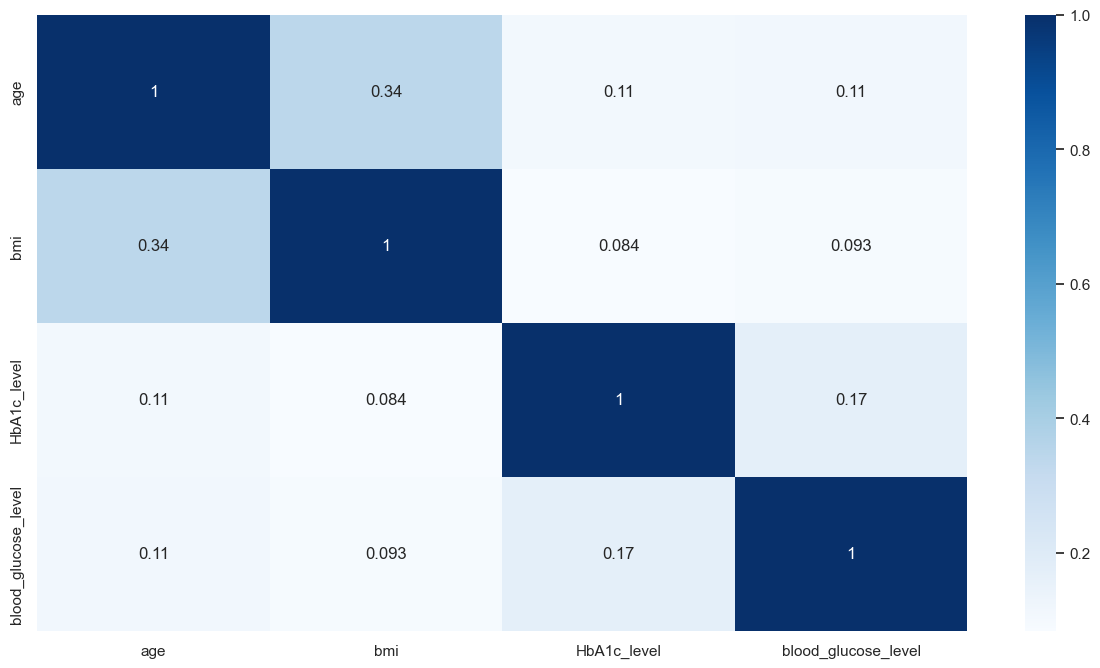

In [31]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

The hypertension, heart_didease and bmi all have a positive correlation with the age column. A positive correlation can also be found in the relationship between the HbA1c_ level and diabetes columns and the HbA1c level and the blood glucose level. There is a weak positive correlation between the blood glucose level and the the HbA1c levels.

In [32]:
# Creating a copy of the original dataset
diabetes = data.copy()

## Feature Engineering


In this section, certain features will be extracted from the numerical columns based on their values.

In [33]:
bins = [0, 18, 40, 60, np.inf]
labels = ['child', 'young', 'middle aged', 'senior']
diabetes['age_group'] = pd.cut(diabetes['age'], bins, labels = labels)

In [34]:
bins = [0, 70, 140, 200, np.inf]
labels = ['low', 'normal', 'high', 'risky']
diabetes['glucose_category'] = pd.cut(diabetes['blood_glucose_level'], bins, labels = labels)

In [35]:
bins = [0, 18, 25, 30, np.inf]
labels = ['underweight', 'healthy', 'over_weight', 'obese']
diabetes['bmi_category'] = pd.cut(diabetes['bmi'], bins, labels = labels)

In [36]:
diabetes = pd.get_dummies(diabetes, columns = ['age_group', 'glucose_category', 'bmi_category', 'smoking_history', 'gender'], drop_first = True)

In [37]:
# Splitting the dataset into independent features and target feature.
x = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

In [38]:
#Splitting the data into training and test sets; 70% for training and 30% for testing or validating the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15, stratify = y)

In [39]:
# Oversampling the minority class in the training set. This is because of the class imbalance and the few number of samples we have
ros = SMOTE(random_state = 105)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

## Feature Selection

Important features necessary to predict the target variable which is 'diabetes' are selected from the dataset. This will be done using the RFE algorithm.

RFE is an iterative process that works as follows:

- Train the model on all the features and rank them based on their importance.
- Eliminate the least important feature.
- Repeatedly train the model on the remaining features and eliminate the least significant feature until the desired number of features is reached.
- RFE considers the interaction between features and their impact on the model’s performance.

In [40]:
#Instantiating the random forest regressor model
rf = RandomForestClassifier()

In [41]:
selector= RFE(estimator= rf, n_features_to_select = 10)
selector.fit_transform(x_train_ros, y_train_ros)

array([[24.        , 18.24      ,  6.6       , ...,  0.        ,
         0.        ,  0.        ],
       [47.        , 19.        ,  5.        , ...,  0.        ,
         0.        ,  1.        ],
       [79.        , 26.46      ,  6.1       , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [80.        , 34.67914497,  7.06533383, ...,  1.        ,
         1.        ,  1.        ],
       [59.09843173, 27.32      ,  7.        , ...,  1.        ,
         0.        ,  0.        ],
       [73.        , 29.86961207,  7.20624417, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
selected = x.columns[selector.get_support()]
print('The selected features are {}'.format(list(selected)))

The selected features are ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'age_group_young', 'age_group_senior', 'glucose_category_normal', 'glucose_category_risky', 'bmi_category_obese', 'smoking_history_never']


These newly selected features will be used in the training of the predictive models.

## Data Modelling




This modelling task is a classification task. The performance metric of each model to be built is the 'Recall','Precision' and the Accuracy metric. The accuracy metric cannot be used due to the nature of the class imbalance in the dataset. 

- Recall shows whether a model can find all objects of a target class. The recall is the ratio of correct predicitons and the total number of correct items. It indicates how good a model is at predicting the correct class.
- Precision shows how often an ML model is correct when predicting the target class. It is the ratio between the correct predictions and the total predictions. It indicates how good a model is at whatever it predicted. 
- Accuracy represents the number of correct predictions.
- AUC-ROC plot: AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.




The data modelling task will be done with the aid of a function.

STEPS:
- Cross validating the model.
- Retraining the model on the full training set.
- Validating the model on the test set.
- Hyperparameter tuning to find the optimum hyperparameters for each model.

In [43]:
# Split the data using StratifiedKFold and get the average performance metrics score
def cross_validate(model, xtrain, ytrain):
    # Function for the cross validation of models.
    skf = StratifiedKFold()
    mean_accuracy = 0
    for train_ix, test_ix in skf.split(xtrain, ytrain):
        X_train, X_test = xtrain.iloc[train_ix], xtrain.iloc[test_ix]
        Y_train, Y_test = ytrain.iloc[train_ix], ytrain.iloc[test_ix]
        # Import the function that computes class weights

        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        mean_accuracy += accuracy_score(Y_test, predictions)

    print(f'Mean Training Accuracy Score: {mean_accuracy / skf.n_splits}')

In [44]:
def modelling(model_name, model , xtrain , ytrain , xtest , ytest):
    # A function to train and validate the model using evaluation metrics
    model.fit(xtrain.values , ytrain.values)
    pred= model.predict(xtest)
    train_score = model.score(xtrain.values, ytrain.values)
    test_score = accuracy_score(ytest, pred)
    report = classification_report(pred, ytest)
    matrix = confusion_matrix(pred, ytest)
    recall = recall_score(pred, ytest)
    precision = precision_score(pred, ytest)
    print('MODEL: {}'.format(model_name))
    print('-' * 80)
    print('Training Accuracy is : {}%'.format(round(train_score * 100), 2))
    print('Test Accuracy is {}%'.format(round(test_score * 100), 2))
    print('The classification report : \n {} '.format(report))
    sns.heatmap(matrix, annot = True, xticklabels = y.unique(), yticklabels = y.unique(), cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for the {} model'.format(model_name))
    plt.show()
    
    y_pred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = roc_curve(ytest,  y_pred_proba)
    auc = roc_auc_score(ytest, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC_AUC plot for the {} model'.format(model_name))
    plt.legend(loc=4)
    plt.show()

### KNN Model

In [45]:
# Instantiating the KNN algorithm
knn = KNeighborsClassifier()

In [46]:
#Cross validating the KNearestNeighbors model...
cross_validate(knn, x_train_ros[selected], y_train_ros)

Mean Training Accuracy Score: 0.9351014421901735


MODEL: K Nearest Neighbors
--------------------------------------------------------------------------------
Training Accuracy is : 96%
Test Accuracy is 90%
The classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     24486
           1       0.79      0.46      0.58      4358

    accuracy                           0.90     28844
   macro avg       0.85      0.72      0.76     28844
weighted avg       0.89      0.90      0.89     28844
 


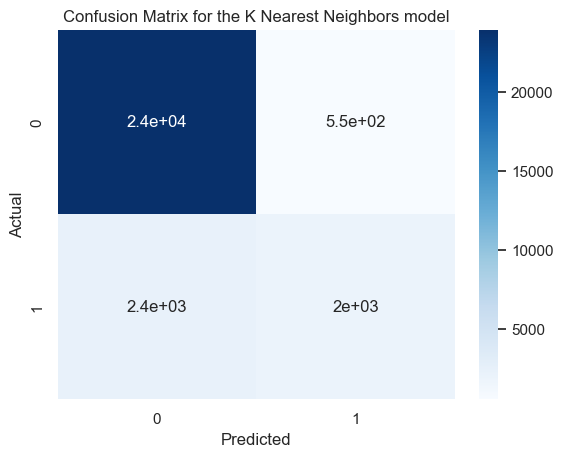

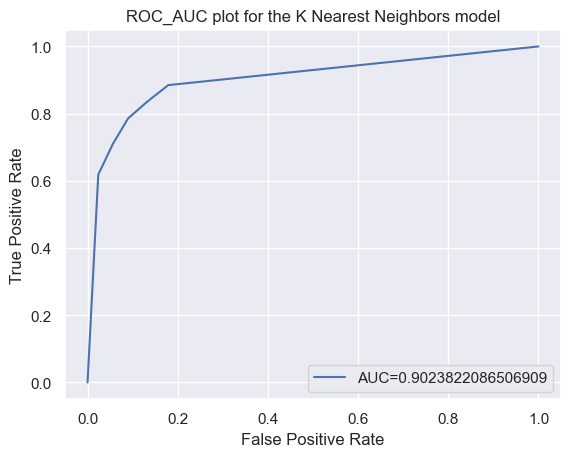

In [47]:
baseline_model_results = modelling('K Nearest Neighbors', knn,
                                  x_train_ros[selected], y_train_ros, x_test[selected],
                                   y_test)
baseline_model_results

#### Hyperparameter Tuning of the KNN Model

In [48]:
random_grid = {
    "n_neighbors": range(1, 10, 1),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p": [1, 2, 3, 4, 5, 6]
}
random_estimator_knn = RandomizedSearchCV(estimator=knn,
                                         param_distributions=random_grid,
                                         n_iter=3,
                                         scoring='accuracy',
                                         n_jobs=-1,
                                         cv=3,
                                         verbose=1,
                                         random_state=1,
                                         )

In [49]:
random_estimator_knn.fit(x_train_ros[selected], y_train_ros)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=3, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(1, 10),
                                        'p': [1, 2, 3, 4, 5, 6],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='accuracy', verbose=1)

MODEL: Fine Tuned KNN
--------------------------------------------------------------------------------
Training Accuracy is : 100%
Test Accuracy is 95%
The classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     26935
           1       0.58      0.77      0.66      1909

    accuracy                           0.95     28844
   macro avg       0.78      0.86      0.81     28844
weighted avg       0.96      0.95      0.95     28844
 


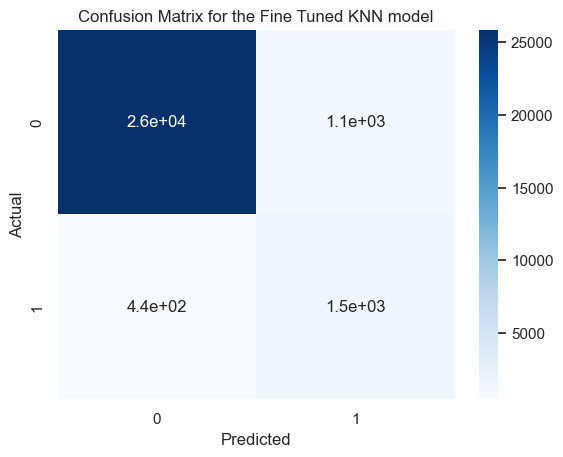

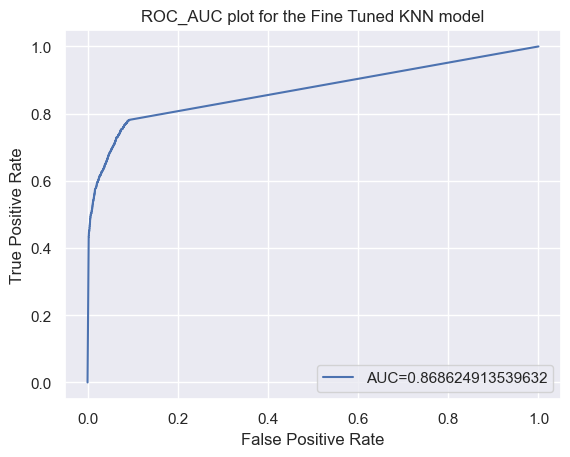

In [50]:
knn_tuned_model_results = modelling('Fine Tuned KNN', random_estimator_knn.best_estimator_, x_train[selected], y_train,
                                   x_test[selected], y_test)
knn_tuned_model_results

The KNN model performed good in terms of the previously stated performance metrics, originally, it has an test accuracy of 90% and after hyperparameter tuning, the test accuracy increased to 95%. Hyperparameter tuning reduced the AUC score from 90.2 to 86.9% meaning the tuned KNN model fails performs more poorly at differentiating between classes than the original model.

### Decision Tree Classifier Model

In [51]:
dt = DecisionTreeClassifier(random_state = 105)

In [52]:
#Cross validating the Decision tree model...
cross_validate(dt, x_train_ros[selected], y_train_ros)

Mean Training Accuracy Score: 0.9679296015644097


MODEL: Decision Tree Classifier
--------------------------------------------------------------------------------
Training Accuracy is : 100%
Test Accuracy is 95%
The classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     26144
           1       0.73      0.69      0.71      2700

    accuracy                           0.95     28844
   macro avg       0.85      0.83      0.84     28844
weighted avg       0.95      0.95      0.95     28844
 


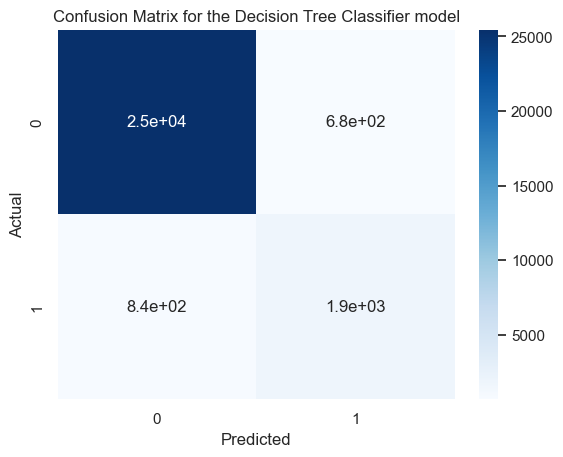

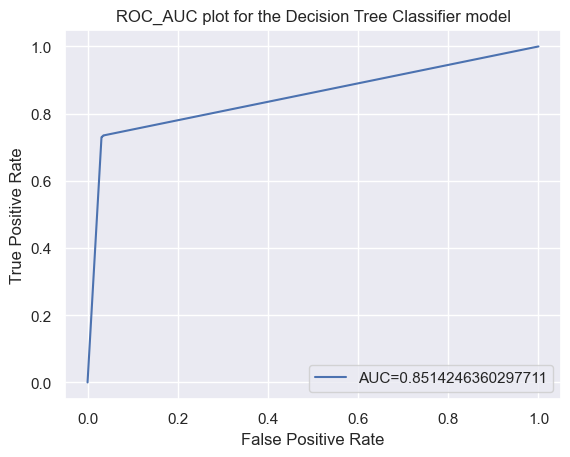

In [53]:
dt_model_results = modelling('Decision Tree Classifier', dt,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
dt_model_results

#### Hyperparameter tuning for the Decision Tree Classifier

In [54]:
random_grid = {
    "max_features": [5, 10, 20],
    "max_depth": [5, 7, 9, 11],
    "min_samples_leaf": [2, 3, 5, 7, 9],
    "min_samples_leaf": [2, 3, 4, 5, 6]
}
random_estimator_dt = RandomizedSearchCV(estimator=dt,
                                         param_distributions=random_grid,
                                         n_iter=3,
                                         scoring='accuracy',
                                         n_jobs=-1,
                                         cv=3,
                                         verbose=1,
                                         random_state=1,
                                         )

In [55]:
random_estimator_dt.fit(x_train[selected], y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=105),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11],
                                        'max_features': [5, 10, 20],
                                        'min_samples_leaf': [2, 3, 4, 5, 6]},
                   random_state=1, scoring='accuracy', verbose=1)

MODEL: Fine Tuned Decision Tree
--------------------------------------------------------------------------------
Training Accuracy is : 97%
Test Accuracy is 97%
The classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     27139
           1       0.67      1.00      0.80      1705

    accuracy                           0.97     28844
   macro avg       0.83      0.98      0.89     28844
weighted avg       0.98      0.97      0.97     28844
 


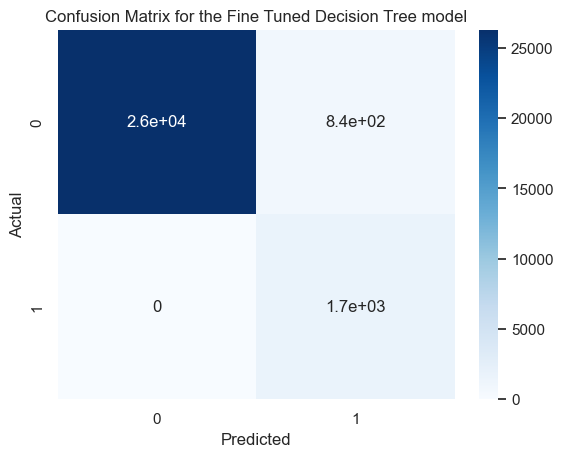

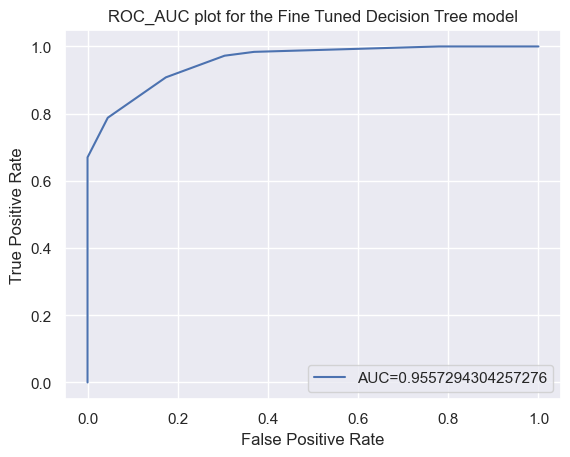

In [56]:
dt_tuned_model_results = modelling('Fine Tuned Decision Tree', random_estimator_dt.best_estimator_, x_train[selected], y_train,
                                   x_test[selected], y_test)
dt_tuned_model_results

The Decision tree model performed better than the KNN model in terms of the previously stated performance metrics, originally, it has an test accuracy of 95% and after hyperparameter tuning, the test accuracy increased to 97%. Hyperparameter tuning increased the AUC score from 85.1% to 95.6% meaning the tuned decision tree model performs more better at differentiating between classes than the original model.


### Random Forest Classifier Model

In [57]:
rf_model = RandomForestClassifier(random_state = 105)

In [58]:
# Cross validating the random forest model...
cross_validate(rf, x_train[selected], y_train)

Mean Training Accuracy Score: 0.966434868305367


MODEL: Random Forest Classifier
--------------------------------------------------------------------------------
Training Accuracy is : 100%
Test Accuracy is 96%
The classification report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     26370
           1       0.73      0.76      0.74      2474

    accuracy                           0.96     28844
   macro avg       0.86      0.86      0.86     28844
weighted avg       0.96      0.96      0.96     28844
 


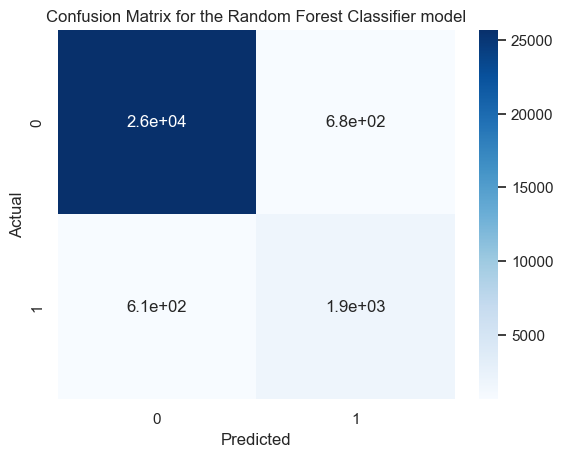

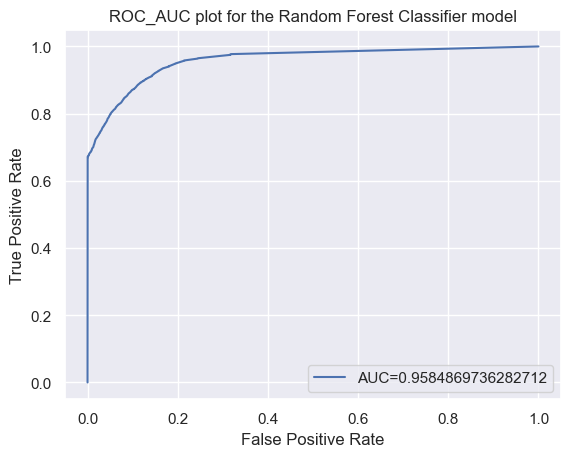

In [59]:
rf_model_results = modelling('Random Forest Classifier', rf,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
rf_model_results

#### Hyperparameter tuning of the Random Forest Classifier Model

In [60]:
random_grid = {
    "max_depth": [5, 7, 9, 11],
    "min_samples_leaf": [2, 3, 5, 7, 9],
    "min_samples_leaf": [2, 3, 4, 5, 6],
    "max_features": [5, 10, 15, 20],
}
random_estimator_rf = RandomizedSearchCV(estimator=rf,
                                         param_distributions=random_grid,
                                         n_iter=3,
                                         scoring='accuracy',
                                         n_jobs=-1,
                                         cv=3,
                                         verbose=1,
                                         random_state=1,
                                         )

In [61]:
random_estimator_rf.fit(x_train[selected], y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11],
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': [2, 3, 4, 5, 6]},
                   random_state=1, scoring='accuracy', verbose=1)

MODEL: Fine Tuned Random Forest
--------------------------------------------------------------------------------
Training Accuracy is : 97%
Test Accuracy is 97%
The classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     27139
           1       0.67      1.00      0.80      1705

    accuracy                           0.97     28844
   macro avg       0.83      0.98      0.89     28844
weighted avg       0.98      0.97      0.97     28844
 


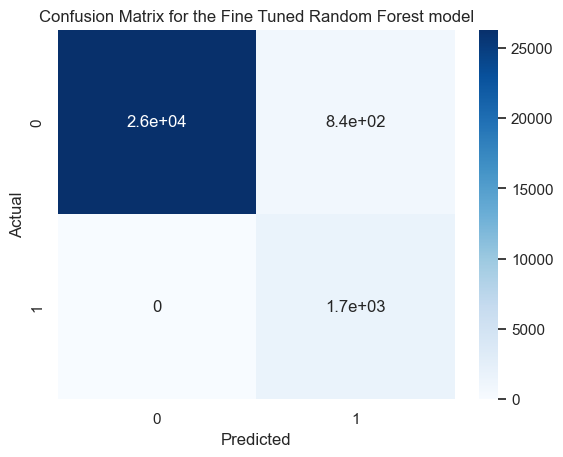

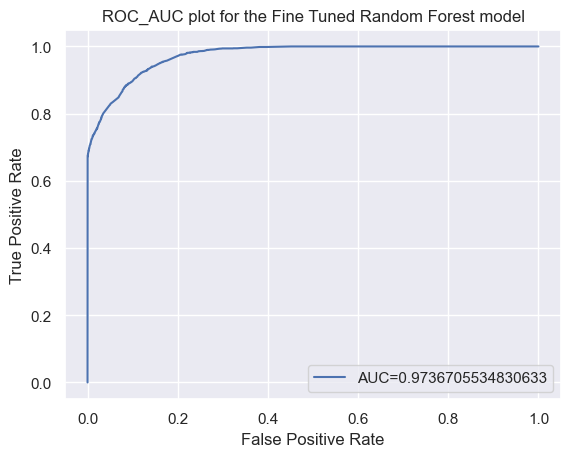

In [62]:
rf_tuned_model_results = modelling('Fine Tuned Random Forest', random_estimator_rf.best_estimator_, x_train[selected], y_train,
                                   x_test[selected], y_test)
rf_tuned_model_results

The Random Forest model performed well in terms of the previously stated performance metrics, originally, it has an test accuracy of 95% and after hyperparameter tuning, the test accuracy increased to 97%. Hyperparameter tuning increased the AUC score from 96% to 97.4% meaning the tuned random forest model performs more better at differentiating between classes than the original model.


### XGBoost Classifier.

In [63]:
xgb = XGBClassifier(random_state = 105)

In [64]:
# Cross validating the xgboost model...
cross_validate(xgb, x_train[selected], y_train)

Mean Training Accuracy Score: 0.9696294363343203


MODEL: XGBoost Classifier
--------------------------------------------------------------------------------
Training Accuracy is : 98%
Test Accuracy is 97%
The classification report : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     26877
           1       0.70      0.91      0.79      1967

    accuracy                           0.97     28844
   macro avg       0.85      0.94      0.89     28844
weighted avg       0.97      0.97      0.97     28844
 


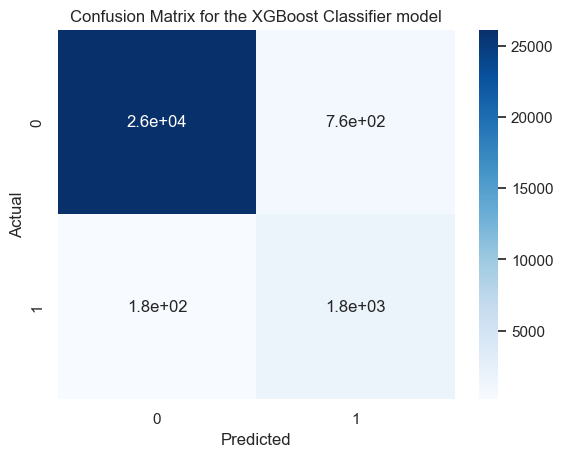

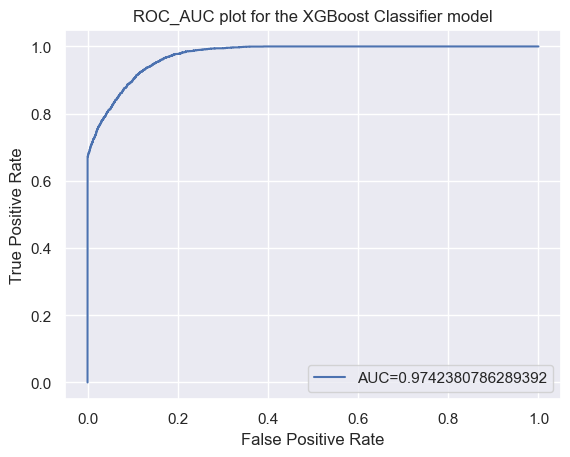

In [65]:
xgb_model_results = modelling('XGBoost Classifier', xgb,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
xgb_model_results

#### Hyperparameter tuning of the XGBoost model

In [66]:
random_grid = {
    'learning_rate': [0.01, 0.05, 0.001],
    'gamma': [0, 0.5, 0.1],
    'reg_alpha': [0, 0.5, 0.1],
    'reg_lambda': [0.5, 1, 1.5],
}
random_estimator_xgb = RandomizedSearchCV(estimator=xgb,
                                          param_distributions=random_grid,
                                          n_iter=3,
                                          scoring='accuracy',
                                          cv=3,
                                          n_jobs=-1,
                                          verbose=1,
                                          random_state=1,
                                          )

In [67]:
random_estimator_xgb.fit(x_train[selected], y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=105, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.5, 0.1],
                                        'learning_rate': [0.01, 0.05, 0.001],
                                        'reg_alpha': [0, 0.5, 0.1],
                                        'reg_lambda': [0.5, 1, 1.5]},
                   random_state=1, scoring='accuracy', verbose=1)

MODEL: Fine-Tuned XGBoost Classifier
--------------------------------------------------------------------------------
Training Accuracy is : 97%
Test Accuracy is 97%
The classification report : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     26837
           1       0.70      0.89      0.79      2007

    accuracy                           0.97     28844
   macro avg       0.85      0.93      0.88     28844
weighted avg       0.97      0.97      0.97     28844
 


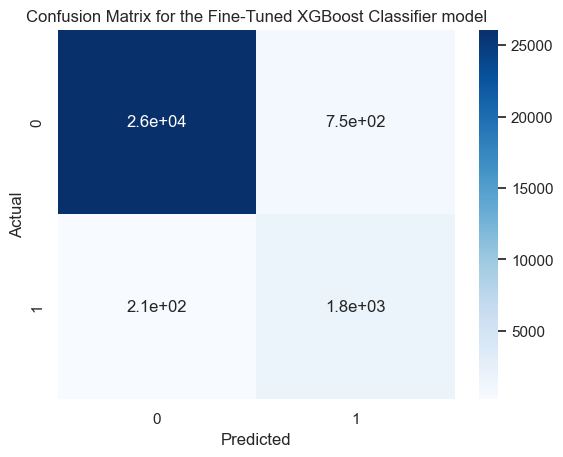

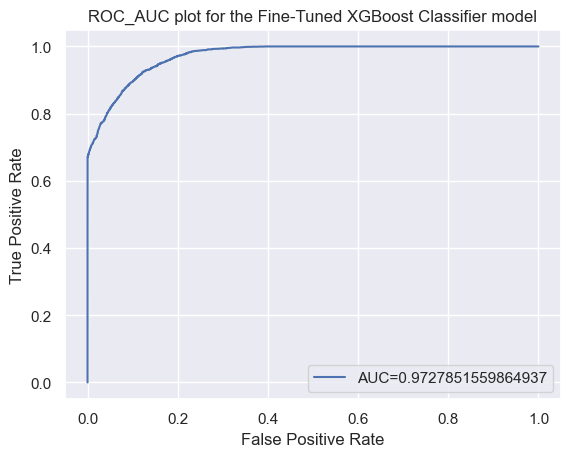

In [68]:
tuned_xgb_model_results = modelling('Fine-Tuned XGBoost Classifier', random_estimator_xgb.best_estimator_,
                                  x_train_ros[selected], y_train_ros, x_test[selected], y_test)
tuned_xgb_model_results

The XGBoost model performed well in terms of the previously stated performance metrics, originally, it has an test accuracy of 97% and after hyperparameter tuning, the test accuracy remained 97%. Hyperparameter tuning reduced the AUC score from 97.4% to 97.3% meaning the tuned xgboost performs a little worse at differentiating between classes than the original model.

The chosen model is the fine tuned random forest classifier. This is because it has the lowest false negative rate than all the other models trained. This is good because it is better for a person that is not diabetic to be predicted as diabetic (False Positive) so that further tests can be ran on the individual than a diabetic individual to be classified as a non-diabetic. 

In [69]:
random_estimator_rf.best_estimator_

RandomForestClassifier(max_depth=7, max_features=10, min_samples_leaf=4)

## Winner Model:

The final chosen model is the Fine tuned Random Forest Classifier Model.
- RandomForestClassifier(max_depth=7, max_features=10, min_samples_leaf=4)

In [70]:
directory = open(r'rf_diabetes_.pkl', 'wb')
pickle.dump(random_estimator_rf.best_estimator_, directory)
directory.close()